In [1]:
# import libraries
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\NITIN\anaconda3.1\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\NITIN\anaconda3.1\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\NITIN\anaconda3.1\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
# batch, classes, epochs
batch_size = 32
num_classes = 10
epochs = 10

In [3]:
# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
50000 train samples
10000 test samples


In [4]:
import pickle
with open("cifar-10-batches-py\data_batch_1", 'rb') as fo:
        cifar_1 = pickle.load(fo, encoding='bytes')


In [5]:
cifar_1.keys()

dict_keys([b'batch_label', b'labels', b'data', b'filenames'])

In [6]:
cifar_1[b'data'].shape

(10000, 3072)

In [7]:
cifar_01=cifar_1[b'data'].reshape(-1,3,32,32)
cifar_01.shape

(10000, 3, 32, 32)

(3, 32, 32)


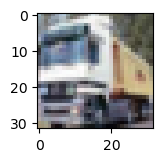

In [8]:
image =cifar_01[1]
print(image.shape)
image=np.transpose(image,(1,2,0))
plt.figure(figsize=(1.5,1.5))
plt.imshow(image)

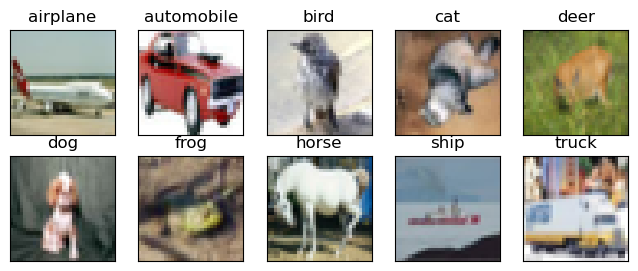

In [9]:
# plotting some random 10 images
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(y_train[:]==i)[0]
    features_idx = x_train[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = (features_idx[img_num,::])
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [11]:
idx.shape

(5000,)

In [10]:
# Convert class vectors to binary class matrices.
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

In [11]:
# model architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [12]:
# summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                        

In [13]:
# compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

# convert to float, normalise the data
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255


In [14]:
# train 
model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)

Epoch 1/10
1563/1563 [==============================] - 218s 138ms/step - loss: 2.0743 - accuracy: 0.2299 - val_loss: 1.8554 - val_accuracy: 0.3404
Epoch 2/10
1563/1563 [==============================] - 217s 139ms/step - loss: 1.8002 - accuracy: 0.3454 - val_loss: 1.6064 - val_accuracy: 0.4124
Epoch 3/10
1563/1563 [==============================] - 216s 138ms/step - loss: 1.6172 - accuracy: 0.4089 - val_loss: 1.4675 - val_accuracy: 0.4643
Epoch 4/10
1563/1563 [==============================] - 221s 142ms/step - loss: 1.4859 - accuracy: 0.4584 - val_loss: 1.3401 - val_accuracy: 0.5166
Epoch 5/10
1563/1563 [==============================] - 218s 139ms/step - loss: 1.3967 - accuracy: 0.4925 - val_loss: 1.2742 - val_accuracy: 0.5402
Epoch 6/10
1563/1563 [==============================] - 214s 137ms/step - loss: 1.3228 - accuracy: 0.5237 - val_loss: 1.2467 - val_accuracy: 0.5560
Epoch 7/10
1563/1563 [==============================] - 216s 138ms/step - loss: 1.2633 - accuracy: 0.5493 - val_

Result: After 50 epochs, the difference between training and validation accuracy is low but the training is slow as compared to the model with batch normalization.